In [1]:
## additonal tutorial on Fourier Transform using scipy
## tutorial url:
## https://realpython.com/python-scipy-fft/

#### Fourier Transform

Fourier analysis is a field that studies how a mathematical function can be decomposed into a series of simpler trigonometric functions. The Fourier transform is a tool from this field for decomposing a function into its component frequencies.

Okay, that definition is pretty dense. For the purposes of this tutorial, the Fourier transform is a tool that allows you to take a signal and see the power of each frequency in it. Take a look at the important terms in that sentence:

A signal is information that changes over time. For example, audio, video, and voltage traces are all examples of signals.

A frequency is the speed at which something repeats. For example, clocks tick at a frequency of one hertz (Hz), or one repetition per second.

Power, in this case, just means the strength of each frequency.

#### Why use Fourier Transform?

The Fourier transform is useful in many applications. For example, Shazam and other music identification services use the Fourier transform to identify songs. JPEG compression uses a variant of the Fourier transform to remove the high-frequency components of images. Speech recognition uses the Fourier transform and related transforms to recover the spoken words from raw audio.`m

#### Time Domain vs Frequency Domain

Time Domain - horizontal axis represents time, and the vertical axis represents amplitude

Frequency Domain - a signal is represented as a series of frequencies (x-axis) that each have an associated power (y-axis)

## Remove Unwanted Noise From Audio

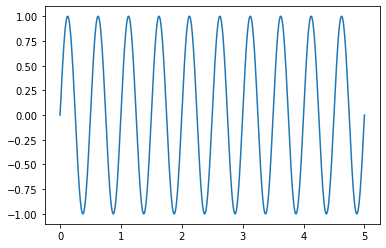

In [3]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

#### Mixing audio signals

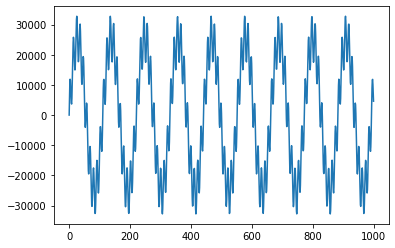

In [4]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

## normalize signal for storage later
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [5]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

#### Using the Fast Fourier Transform (FFT)

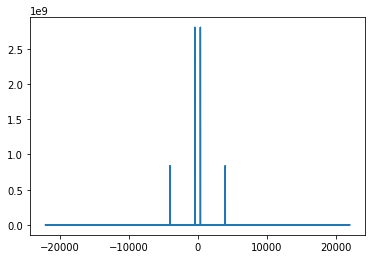

In [6]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

## calculates the transform itself
yf = fft(normalized_tone)

## calculates the frequencies in the center of each bin in the output of fft()
## Without this, there would be no way to plot the x-axis on your frequency spectrum
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

#### Making It Faster With rfft()

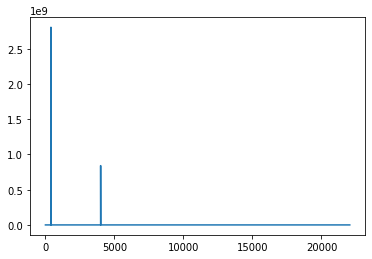

In [7]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()